# Projet 211 optimisation paramétrique

In [13]:
#inclusion des librairies
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
from scipy import misc

In [14]:
#Initialisation des vitesses posibles et du debit souhaité
Vitesse_leger = np.linspace(40,150,100)
Vitesse_lourd = np.linspace(10,120,100)
Debit = 200

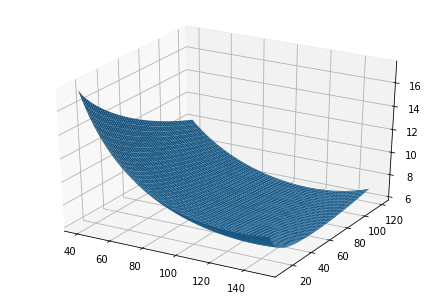

In [15]:
#Equation, critère
ax = Axes3D(plt.figure())
X, Y = np.meshgrid(Vitesse_leger,Vitesse_lourd)

def f(vitesse_leger,vitesse_lourd) :
    critere_partie_1 = (np.exp(0.3734+0.06*(0.75*vitesse_leger/2+ 0.25*vitesse_lourd/2))-30)/30 #Nombre de mort
    critere_partie_2 = Debit/((80*vitesse_leger/100) + (20*vitesse_lourd/100)) #Debit
    critere = critere_partie_1 + 3*critere_partie_2 + 0.2*vitesse_leger/vitesse_lourd
    return critere 


Z = f(X,Y)
ax.plot_surface(X,Y,Z)
plt.show()

In [16]:
#Fonction permettant de réaliser les dérivés partielles pour le calcul du gradient
def derivee_partielle(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(*args)
    return misc.derivative(wraps, point[var], dx = 1e-6)


In [17]:
#Constantes de résolution
ALPHA = 100 # coefficient
MAXITER = 10000 # Nb max d'iteration
EPSILON = 0.000001 # scondition d'arret

#Conditions initiales
vleger_precedent = 50 
vlourd_precedent = 90
critere_precedent = f(vleger_precedent,vlourd_precedent)

nb_iter = 0 
critere = critere_precedent-1



278


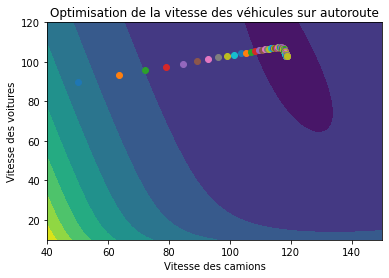

La vitesse optimale est de  118.66563415641735 km/h pour les voitures et  102.80212917897927 km/h pour les camions


In [18]:
#Initialisation de l'affichage
plt.contourf(X,Y,f(X,Y))
plt.scatter(vleger_precedent,vlourd_precedent)

#Boucle de résolution / Algorythme du gradient descendant
while abs( critere_precedent - critere ) > EPSILON and nb_iter < MAXITER:
    nb_iter += 1

    vleger = vleger_precedent - ALPHA * derivee_partielle(f, 0, [vleger_precedent,vlourd_precedent])
    vlourd = vlourd_precedent - ALPHA * derivee_partielle(f, 1, [vleger_precedent,vlourd_precedent])
    
    vleger_precedent = vleger
    vlourd_precedent = vlourd
    critere_precedent = critere
    
    critere = f(vleger,vlourd)
    plt.scatter(vleger, vlourd)

#Affichage du résultat
print(nb_iter)
plt.title("Optimisation de la vitesse des véhicules sur autoroute")
plt.xlabel("Vitesse des camions")
plt.ylabel("Vitesse des voitures")
plt.show()
print("La vitesse optimale est de ",vleger,"km/h pour les voitures et ",vlourd,"km/h pour les camions")